In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import constclust as cc

In [2]:
adata = sc.read_h5ad("cite/cite_gex_processed_training.h5ad")
adata

AnnData object with n_obs × n_vars = 43976 × 13953
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-s1d1', 'highly_variable-s1d1', 'n_cells-s1d2', 'highly_variable-s1d2', 'n_cells-s1d3', 'highly_variable-s1d3', 'n_cells-s2d1', 'highly_variable-s2d1', 'n_cells-s2d4', 'highly_variable-s2d4', 'n_cells-s3d6', 'highly_variable-s3d6', 'n_cells-s3d7', 'highly_variable-s3d7'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log_norm'

<AxesSubplot:>

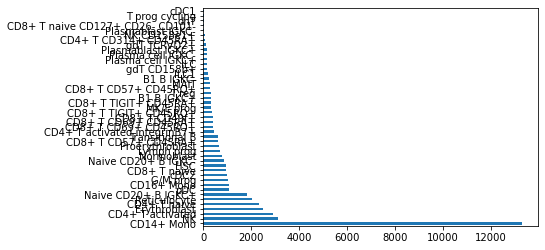

In [3]:
adata.obs.cell_type.value_counts().plot(kind="barh")

<AxesSubplot:>

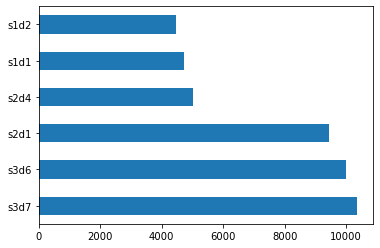

In [4]:
adata.obs.batch.value_counts().plot(kind="barh")

In [5]:
pd.crosstab(adata.obs.cell_type, adata.obs.batch, margins=True)

batch,s1d1,s1d2,s2d1,s2d4,s3d6,s3d7,All
cell_type,,,,,,,
B1 B IGKC+,51,35,79,0,76,78,319
B1 B IGKC-,38,44,48,0,60,37,227
CD4+ T CD314+ CD45RA+,0,82,0,0,0,0,82
CD4+ T activated,348,803,611,324,487,339,2912
CD4+ T activated integrinB7+,114,106,94,20,111,0,445
CD4+ T naive,538,230,798,241,318,196,2321
CD8+ T CD49f+,45,44,59,29,204,15,396
CD8+ T CD57+ CD45RA+,31,158,26,0,415,0,630
CD8+ T CD57+ CD45RO+,0,104,45,14,91,47,301


In [3]:
adata_s2d1 = adata[adata.obs.batch == "s2d1", :].copy()
adata_s2d1

AnnData object with n_obs × n_vars = 9422 × 13953
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-s1d1', 'highly_variable-s1d1', 'n_cells-s1d2', 'highly_variable-s1d2', 'n_cells-s1d3', 'highly_variable-s1d3', 'n_cells-s2d1', 'highly_variable-s2d1', 'n_cells-s2d4', 'highly_variable-s2d4', 'n_cells-s3d6', 'highly_variable-s3d6', 'n_cells-s3d7', 'highly_variable-s3d7'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log_norm'

<AxesSubplot:>

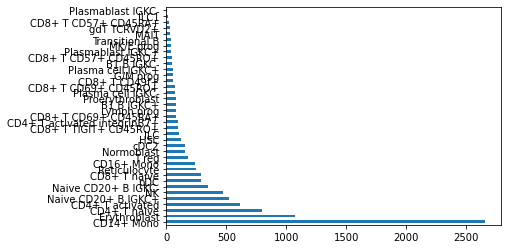

In [7]:
adata_s2d1.obs.cell_type.value_counts().plot(kind="barh")

In [10]:
sc.pp.highly_variable_genes(adata_s2d1, flavor="cell_ranger", n_top_genes=2000)
sc.tl.pca(adata_s2d1)
sc.pp.neighbors(adata_s2d1)
sc.tl.umap(adata_s2d1)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


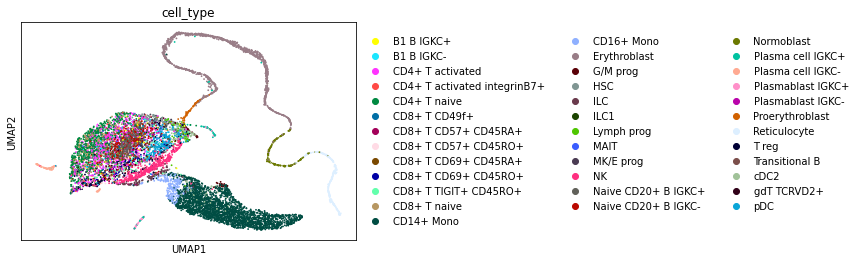

In [11]:
sc.pl.umap(adata_s2d1, color="cell_type")

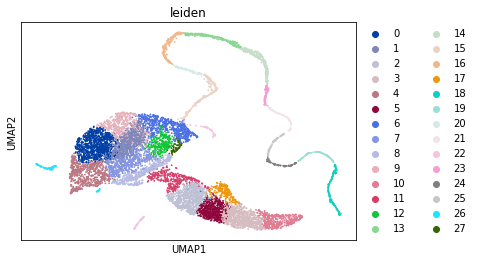

In [13]:
sc.tl.leiden(adata_s2d1)
sc.pl.umap(adata_s2d1, color="leiden")

In [17]:
settings, clusterings = cc.cluster(
    adata_s2d1,
    n_neighbors=np.linspace(15, 90, 4, dtype=np.int),
    resolutions=np.geomspace(0.05, 20, 25),
    random_state=[0, 1, 2],
    n_procs=4
)

/var/folders/rj/60lhr791617422kqvh0r4vy40000gn/T/ipykernel_21389/773971557.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_neighbors=np.linspace(15, 90, 4, dtype=np.int),
Finding communities: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [02:26<00:00,  2.04it/s]
/Users/luke.zappia/miniconda/envs/constclust/lib/python3.8/site-packages/constclust/cluster.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [18]:
settings

,n_neighbors,resolution,random_state
0,15,0.050000,0
1,15,0.064178,0
2,15,0.082377,0
3,15,0.105737,0
4,15,0.135721,0
...,...,...,...
295,90,7.368063,2
296,90,9.457416,2
297,90,12.139245,2
298,90,15.581556,2


In [19]:
clusterings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
GCAGCCATCCTCGCAT-1-s2d1,0,0,0,0,0,2,1,0,2,4,...,7,5,19,4,12,24,13,2,57,96
CAACAACTCGAACGCC-1-s2d1,0,0,0,0,0,1,0,1,0,0,...,10,24,22,21,29,28,6,9,19,22
TCACACCCAAGTGGGT-1-s2d1,0,0,0,0,3,4,4,6,4,5,...,8,29,34,36,40,45,41,34,12,4
ATTACCTAGTCGTCTA-1-s2d1,0,0,0,0,0,2,1,0,2,3,...,7,5,19,12,10,6,64,19,44,64
TCTTTGATCGGCACTG-1-s2d1,1,1,1,1,1,0,2,2,3,2,...,0,2,1,14,28,41,28,20,6,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCACTAAGTAAGATTG-1-s2d1,2,2,2,2,2,3,5,9,6,11,...,19,21,15,35,37,43,36,23,120,136
CTGATCCTCGGTAAGG-1-s2d1,1,1,1,1,1,0,3,3,1,1,...,2,1,0,5,4,1,45,83,62,72
TGAATGCAGCTCATAC-1-s2d1,1,1,1,1,1,0,3,3,1,1,...,2,1,0,5,4,1,3,10,3,113
AAGACAACACGAGGTA-1-s2d1,0,0,0,0,0,2,1,0,2,9,...,7,5,25,24,18,4,1,3,46,120


In [47]:
neighbours = [5, 15, 30, 50]
resolutions = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0]
states = [0, 1, 2]
distances = ["euclidean", "correlation", "cosine"]

In [56]:
results = {}

for distance in distances:
    print(f"Clustering using {distance} distance:")
    settings, clusterings = cc.cluster(
        adata_s2d1,
        n_neighbors=neighbours,
        resolutions=resolutions,
        random_state=states,
        neighbor_kwargs={"use_rep" : "X_pca", "metric" : distance}, 
        n_procs=4
    )
    settings["distance"] = distance
    settings["n_clusters"] = [clusterings[clustering].nunique() for clustering in clusterings.columns]
    results[distance] = {"settings" : settings, "clusterings" : clusterings}


Clustering using euclidean distance:


Finding communities: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:42<00:00,  3.10it/s]
/Users/luke.zappia/miniconda/envs/constclust/lib/python3.8/site-packages/constclust/cluster.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  clusters[i] = clustering


Clustering using correlation distance:


Finding communities: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:42<00:00,  3.08it/s]
/Users/luke.zappia/miniconda/envs/constclust/lib/python3.8/site-packages/constclust/cluster.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  clusters[i] = clustering


Clustering using cosine distance:


Finding communities: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:42<00:00,  3.12it/s]
/Users/luke.zappia/miniconda/envs/constclust/lib/python3.8/site-packages/constclust/cluster.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  clusters[i] = clustering


In [70]:
settings = pd.concat([results[distance]["settings"] for distance in distances])
settings["id"] = [f"C{row:03}" for row in range(1, len(settings) + 1)]
settings = settings[["id", "distance", "n_neighbors", "resolution", "random_state", "n_clusters"]]
settings

,id,distance,n_neighbors,resolution,random_state,n_clusters
0,C001,euclidean,5,0.01,0,7
1,C002,euclidean,5,0.05,0,12
2,C003,euclidean,5,0.10,0,14
3,C004,euclidean,5,0.20,0,20
4,C005,euclidean,5,0.30,0,22
...,...,...,...,...,...,...
127,C392,cosine,50,0.80,2,16
128,C393,cosine,50,1.00,2,20
129,C394,cosine,50,2.00,2,26
130,C395,cosine,50,5.00,2,55


In [71]:
clusterings = pd.concat([results[distance]["clusterings"] for distance in distances], axis=1)
clusterings = clusterings.set_axis(settings["id"], axis=1)
clusterings

id,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,...,C387,C388,C389,C390,C391,C392,C393,C394,C395,C396
GCAGCCATCCTCGCAT-1-s2d1,0,0,0,4,6,7,12,10,15,16,...,0,0,0,2,5,6,6,8,8,74
CAACAACTCGAACGCC-1-s2d1,0,0,0,0,0,4,11,15,10,4,...,0,0,0,1,1,4,2,6,34,14
TCACACCCAAGTGGGT-1-s2d1,0,0,0,4,6,8,9,12,28,38,...,0,0,5,3,7,11,14,14,44,32
ATTACCTAGTCGTCTA-1-s2d1,0,0,0,0,3,7,13,14,16,2,...,0,0,0,2,5,6,6,8,8,35
TCTTTGATCGGCACTG-1-s2d1,1,1,1,2,1,1,0,5,3,10,...,1,1,1,0,4,3,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCACTAAGTAAGATTG-1-s2d1,2,2,3,6,10,13,14,23,37,81,...,2,2,3,4,3,1,5,1,4,9
CTGATCCTCGGTAAGG-1-s2d1,1,1,1,1,4,3,2,6,6,45,...,1,1,1,5,0,0,0,4,1,71
TGAATGCAGCTCATAC-1-s2d1,1,1,1,1,4,3,2,6,6,1,...,1,1,1,5,0,0,0,4,1,2
AAGACAACACGAGGTA-1-s2d1,0,0,0,4,6,7,13,14,26,3,...,0,0,0,2,5,6,6,8,24,74


In [73]:
settings.to_csv("s2d1_settings.tsv", sep="\t", index=False)

In [75]:
clusterings.to_csv("s2d1_clustering.tsv", sep="\t", index_label="cell")

In [11]:
adata_s2d1.obs[["cell_type"]].to_csv("s2d1_labels.tsv", sep="\t", index_label="cell")